<a href="https://colab.research.google.com/github/Rashimanish/Flight_App/blob/main/Data_Collection/Handling_Duplicate_records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

#Read dataset
df = pd.read_csv('/content/cleaned_data.csv')

In [3]:
df.shape

(1804443, 22)

To get a general understanding of the data's distribution and summary statistics.

In [4]:
print(df.describe())

               YEAR       QUARTER         MONTH  DAY_OF_MONTH  \
count  1.804443e+06  1.804443e+06  1.804443e+06  1.804443e+06   
mean   2.022517e+03  2.535932e+00  6.607831e+00  1.572751e+01   
std    4.997226e-01  1.110972e+00  3.416176e+00  8.762827e+00   
min    2.022000e+03  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.022000e+03  2.000000e+00  4.000000e+00  8.000000e+00   
50%    2.023000e+03  3.000000e+00  7.000000e+00  1.600000e+01   
75%    2.023000e+03  4.000000e+00  1.000000e+01  2.300000e+01   
max    2.023000e+03  4.000000e+00  1.200000e+01  3.100000e+01   

       ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  CRS_DEP_TIME      DEP_TIME  \
count       1.804443e+06     1.804443e+06  1.804443e+06  1.804443e+06   
mean        1.268103e+04     1.268127e+04  1.337574e+03  1.334923e+03   
std         1.324084e+03     1.324163e+03  5.191596e+02  5.386750e+02   
min         1.039700e+04     1.039700e+04  1.000000e+00  1.000000e+00   
25%         1.129800e+04     1.129800e+04  9.0000

In [5]:
# count for categorical columns
print(df['ORIGIN'].value_counts())
print(df['DEST'].value_counts())


ORIGIN
LAX    178861
DEN    142352
ATL    141011
ORD    140758
LAS    136280
DFW    125520
SFO    123182
PHX    115732
SEA    110796
MCO    109557
EWR    106739
JFK    100300
IAH     96473
MIA     90817
CLT     86065
Name: count, dtype: int64
DEST
LAX    179242
DEN    142077
ATL    141127
ORD    140599
LAS    136652
DFW    125357
SFO    123330
PHX    115729
SEA    110808
MCO    109408
EWR    106509
JFK    100268
IAH     96400
MIA     90680
CLT     86257
Name: count, dtype: int64


Visualize missing values if available

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
FL_DATE                0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
DEST_AIRPORT_ID        0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY_NEW          0
DEP_DEL15              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY_NEW          0
ARR_DEL15              0
Maximum temperature    0
Minimum temperature    0
Precipitation          0
Snowfall               0
Average wind speed     0
dtype: int64


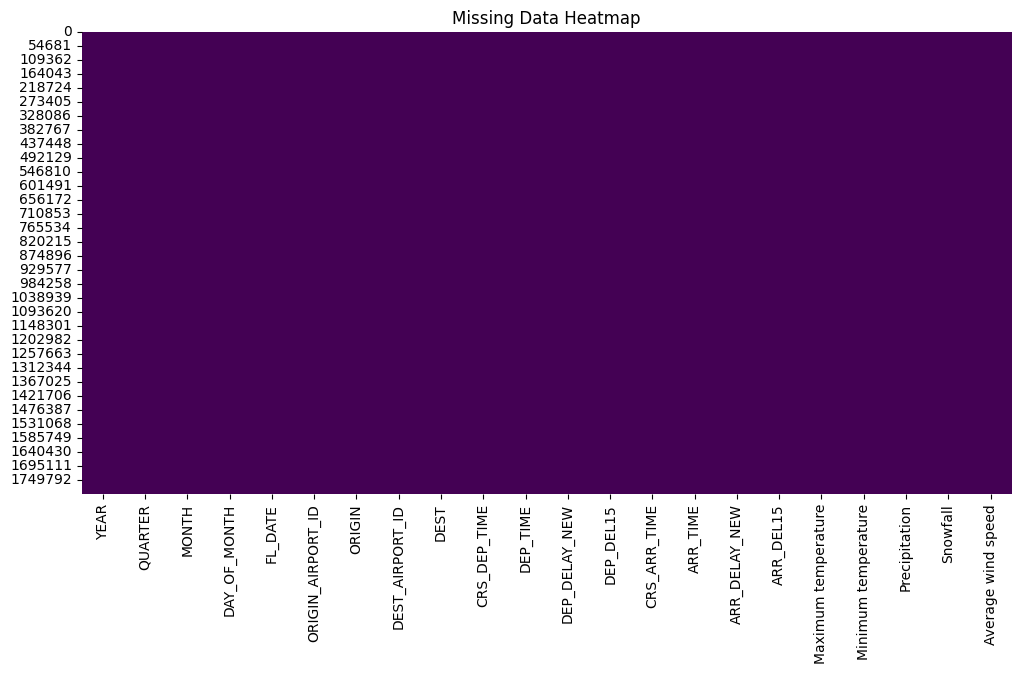

In [7]:
# Count of missing values per column
print(df.isnull().sum())

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


## **Discovering Duplicate Records and Treating**



In [9]:
# Identify duplicates based on multiple columns
duplicates = df[df.duplicated(subset=['FL_DATE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME'], keep=False)]

# Count the number of duplicate records
num_duplicates = duplicates.shape[0]

print(f'Number of duplicate records based on multiple columns: {num_duplicates}')

Number of duplicate records based on multiple columns: 3615


In [10]:
# Display duplicate records
duplicates_sorted = duplicates.sort_values(by=['FL_DATE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME'])
display(duplicates_sorted)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,Maximum temperature,Minimum temperature,Precipitation,Snowfall,Average wind speed
595,2022,1,1,1,2022-01-01,14771,SFO,14747,SEA,1250,...,1.0,1505,1548.0,43.0,1.0,52,39,0.0,0.022185,3.13
596,2022,1,1,1,2022-01-01,14771,SFO,14747,SEA,1250,...,0.0,1505,1503.0,0.0,0.0,52,39,0.0,0.022185,3.13
2501,2022,1,1,2,2022-01-02,14771,SFO,12892,LAX,1900,...,1.0,2037,2150.0,73.0,1.0,53,35,0.0,0.022185,4.25
2515,2022,1,1,2,2022-01-02,14771,SFO,12892,LAX,1900,...,0.0,2037,2013.0,0.0,0.0,53,35,0.0,0.022185,4.25
12188,2022,1,1,6,2022-01-06,12478,JFK,12892,LAX,2130,...,1.0,59,100.0,1.0,0.0,41,34,0.0,0.000000,11.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803654,2023,4,12,31,2023-12-31,10397,ATL,13303,MIA,800,...,0.0,959,1124.0,85.0,1.0,57,31,0.0,0.000000,6.26
1803943,2023,4,12,31,2023-12-31,12478,JFK,13204,MCO,1200,...,0.0,1456,1443.0,0.0,0.0,43,38,0.0,0.000000,12.08
1803944,2023,4,12,31,2023-12-31,12478,JFK,13204,MCO,1200,...,0.0,1456,1439.0,0.0,0.0,43,38,0.0,0.000000,12.08
1804020,2023,4,12,31,2023-12-31,12889,LAS,14107,PHX,635,...,0.0,850,828.0,0.0,0.0,59,42,0.0,0.000000,3.80


In [11]:
# Check the uniqueness of the combination of columns
unique_combinations = df.duplicated(subset=['FL_DATE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME']).sum()
total_rows = df.shape[0]

print(f'Number of unique combinations of FL_DATE, ORIGIN, DEST, CRS_DEP_TIME, CRS_ARR_TIME: {total_rows - unique_combinations}')


Number of unique combinations of FL_DATE, ORIGIN, DEST, CRS_DEP_TIME, CRS_ARR_TIME: 1802634


In [12]:
# Remove duplicates based on the combination of columns
df_no_duplicates = df.drop_duplicates(subset=['FL_DATE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME'], keep='first')
print(f'Number of records after removing duplicates: {df_no_duplicates.shape[0]}')

# Save the cleaned dataset to a CSV file
cleaned_file_path = '/content/cleaned_data_01_08.csv'
df_no_duplicates.to_csv(cleaned_file_path, index=False)


Number of records after removing duplicates: 1802634
